In [385]:
%pylab
%matplotlib inline
from scipy import constants
import numpy as np
from astropy import constants as const
from scipy.stats import *
import numpy as np
#from scipy.stats import *
import matplotlib.pyplot as plt
import matplotlib.path as mpath

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Box F - RC Parallel

[    20     40     60     80    100    200    400    600    800   1000
   2000   4000   5000   6000   7000   8000   9000  10000  20000  40000
  60000  80000 100000]


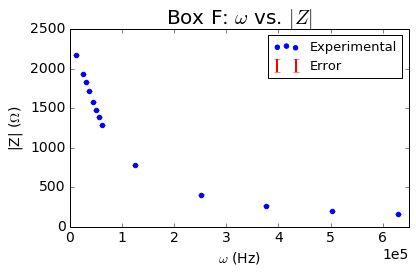

In [415]:
f = array([20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 2000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,
           20000, 40000, 60000, 80000, 100000])

V_1 = array([204, 200, 200, 200, 200, 200, 204, 202, 206, 204, 204, 214, 214, 218, 228, 232, 228, 230, 265,
             272, 284, 280, 284])*.001

V_2 = array([212, 212, 205, 212, 210, 214, 210, 212, 210, 214, 218, 222, 224, 228, 232, 235, 235, 238, 260, 280,
       284, 284, 284])*.001

phase = array([0, 0, 0, 0, 0, 0, 0, 1, 5, 8, 14, 30, 35, 40, 43, 48, 50, 53, 68, 75, 80, 82, 83])

R = array([2400, 2400, 2339, 2400, 2400, 2400, 2348, 2300, 2288, 2300, 2320, 2000, 1920, 1800, 1601,
           1500, 1429, 1328, 768, 420, 269, 200, 160.5])

w = 2*pi*f

R_o = 2338

I = V_2/R

Z = V_1/I

Y = 1/Z ## = 1/R + (1j)*w*C

C = tan(phase)/(w*R)

Y_mag = sqrt(1/R**2 + (w*C)**2)

Y_mag_sqr = (1/R**2 + (w*C)**2)

w_sqr = w**2


#xmin =0
#xmax = 6.3e+05
#xlims = np.linspace(xmin,xmax,13)

#slope, intercept, r_value, p_value, std_err = stats.linregress(w[10:],Z[10:])

#line = slope*xlims+intercept

mpl.rcParams['font.size'] = 14

plt.xlim(0, 6.5e+05)
plt.ylim(0,2500)

#plot(xlims,line,label = "Model")
plt.scatter(w[10:],Z[10:],color = 'blue', label = "Experimental")

plt.errorbar(w[10:], Z[10:], .2, label = "Error", fmt='none', ecolor = "r", linewidth = 2, zorder=0)

plt.xlabel('$\omega$ (Hz)')
plt.ylabel('|Z| ($\Omega$)')

plt.title("Box F: $\omega$ vs. $|Z|$")
plt.legend(prop={'size': 13})#loc='upper left'

ticklabel_format(axis='both', style='sci', scilimits=(-4,4))

plt.tight_layout()


plt.savefig("figures/BoxF_1.pdf")


print f

C = 10.1325669049 nF
R = 2247.7378439 Ω
1.01325669049e-08


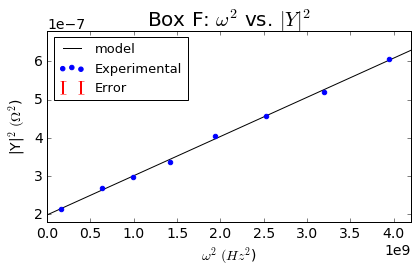

In [416]:
plt.xlim(0, 4.2*10**9)
plt.ylim(1.8*10**-7, 6.8*10**-7)

xmin =0
xmax = 65000
xlims = np.linspace(xmin,xmax,8)

slope, intercept, r_value, p_value, std_err = stats.linregress(w_sqr[10:18],Y[10:18]**2)

line = slope*(xlims**2) + intercept

plot(xlims**2,line,color = "black", label = "model",zorder = 0)
plt.scatter(w_sqr[10:18],Y[10:18]**2,color = 'blue',label = "Experimental")

plt.errorbar(w[10:18], Z[10:18], .2, label = "Error", fmt='none', ecolor = "r", linewidth = 2, zorder=0)

mpl.rcParams['font.size'] = 14

plt.xlabel('$\omega^2 \ (Hz ^2 $)')
plt.ylabel('|Y|$^2 \ (\Omega ^2 $)')


plt.title("Box F: $\omega^2$ vs. $|Y|^2$")
plt.legend(loc='upper left',prop={'size': 13})



C = sqrt(slope)*10**9
R = 1/sqrt(intercept)

print "C =",C,"nF"
print "R =",R,"Ω"


plt.tight_layout()

plt.savefig("figures/BoxF_2.pdf")

print sqrt(slope)

In [417]:
theta = array([0.16, 0.33, 0.49, 0.66, 0.82, 1.64, 3.28, 4.92, 6.56, 8.2, 16.4, 32.8,
               41.0, 49.19, 57.39, 65.59, 73.79, 81.99, 163.98, 327.97, 491.95, 655.93, 819.91])


[ -7.37921065e-02  -1.22986723e-01  -1.63982102e-01  -2.04977313e-01
  -7.37880677e-01  -1.63937797e+00  -3.68451997e+00  -4.50024296e+00
  -5.72030712e+00  -7.33881569e+00  -8.14383768e+00  -1.59713091e+01
  -2.66042829e+01  -3.27798329e+01  -3.82048591e+01  -4.50490144e+01
  -5.21725126e+01  -5.50540201e+01  -7.07404991e+01  -7.68876534e+01
  -8.11730620e+01  -8.27590728e+01  -8.38638015e+01  -8.50078606e+01
  -8.60026498e+01]


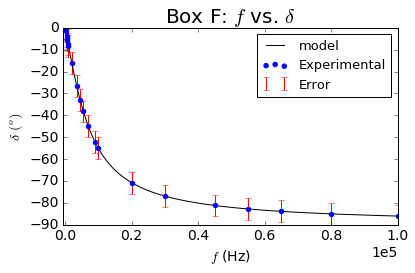

In [623]:
C = 1.01325669049e-08
R = 2247.7378439
theta = degrees(arctan(-w*R*C))

plt.scatter(f,theta,color = 'blue',label = "Experimental")

w_1 = linspace(1.25663706e+02,6.28318531e+05, 20000)
f_1 = linspace(20,100000,20000)
theta_1 = degrees(arctan(-w_1*R*C))

plot(f_1,theta_1,color = "black", label = "model",zorder = 0)

plt.errorbar(f, theta, 5, label = "Error", fmt='none', ecolor = "r", linewidth = 1, zorder=0)

plt.xlim(-.005e5,1e5)
plt.ylim(-90,0)

plt.xlabel('$f$ (Hz)')
plt.ylabel('$\delta \ (^o)$')

plt.title("Box F: $f$ vs. $\delta$")
plt.legend(loc='upper right',prop={'size': 13})#loc='upper left'

ticklabel_format(axis='both', style='sci', scilimits=(-3,3))

plt.tight_layout()

plt.savefig("figures/BoxF_3.pdf")

print theta

# Box E - RLC Series

282743.339


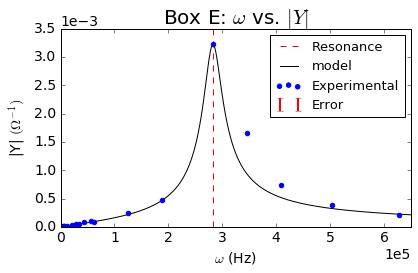

In [588]:
R = array([3700000, 7010000, 10010000, 11010000, 11110000, 1000000, 240000, 190000, 140000, 110000,
           100000, 50000, 29000, 21000, 17000, 12000, 10000, 11000, 4300, 2090, 310, 610, 1400, 2650, 4900])

f = array([9, 15, 20, 25, 90, 200, 450, 550, 700, 900, 1000, 2000, 3500, 4500, 5500, 7000, 9000,
           10000, 20000, 30000, 45000, 55000, 65000, 80000, 100000])

phase = array([17, 12.2, 31, 22, 33, 56, 68, 72.6, 75, 74, 75.6, 79.1, 81, 80, 80.9, 81.7, 81.8,
               78, 80.9, 82.3, 69.6, 82, 90.9, 103, 100.19])

V_1 = array([7.4, 6.8, 5.88, 6.02, 5.12, 5.76, 6.72, 6.64, 6.8, 6.72, 6.88, 7.04, 7.04, 7.2, 7.28, 7.28, 7.28, 7.2, 7.2, 7.36, 6.72, 7.44, 7.92, 8.83, 11])

V_2 = array([6, 6.2, 6.68, 5.68, 6.4, 6.4, 6.8, 6.64, 6.8, 6.96, 6.96, 7.04, 7.28, 7.2, 7.2, 7.2, 7.2, 7.28, 7.52, 7.36, 6.72, 7.52, 8.16, 8.96, 11])

w = array([56.5486678, 94.2477796, 125.663706, 157.079633, 565.486678, 1256.63706, 2827.43339,
           3455.75192, 4398.22972, 5654.86678, 6283.18531, 12566.3706, 21991.1486, 28274.3339,
           34557.5192, 43982.2972, 56548.6678, 62831.8531, 125663.706, 188495.559, 282743.339,
           345575.192, 408407.045, 502654.825, 628318.531])


I = V_2/R

Z = V_1/I

Y = 1/Z


plt.scatter(w,Y,color = 'blue',label = "Experimental")

Y_20 = linspace(0,.004,200)
w_20 = linspace(282743.339,282743.339,200)

plot(w_20,Y_20, 'r--', label = "Resonance",zorder = 0)

plt.errorbar(w, Z, .2, label = "Error", fmt='none', ecolor = "r", linewidth = 2, zorder=0)



L = 0.00894816914067

C = 1.39791591908e-09

R = 310

w_1 = linspace(4.56333333e+06,4.90000000e+03,200000)

z = sqrt(R**2 + ( w_1*L - (1/(w_1*C)) )**2)

y = 1/z

plot(w_1,y,color = "black", label = "model",zorder = 0)


mpl.rcParams['font.size'] = 14

plt.xlim(0,6.5*10**5)
plt.ylim(0, .0035)

plt.xlabel('$\omega$ (Hz)')
plt.ylabel('|Y| $(\Omega ^{-1})$')

plt.title("Box E: $\omega$ vs. $|Y|$")
plt.legend(prop={'size': 13})#loc='upper left'

ticklabel_format(axis='both', style='sci', scilimits=(-3,3))

plt.tight_layout()

plt.savefig("figures/BoxE_1.pdf")


print w[20]

In [589]:
w_o = w[20]
Z = 4508.510638
w_a = 125663.7061
w_b = 628318.5307
w_sqr = w**2

R = 310

L = sqrt(Z**2-R**2)/(w_b-w_a)

C = 1/(L*(w_o**2))


print "L =",'%.3f'%(L*1000),"mH"
print "C =",C*10**9,"nF"


L = 8.948 mH
C = 1.39791591908 nF


16200000.0101


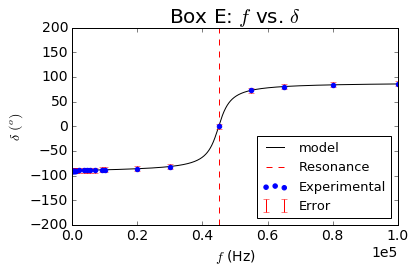

In [590]:
R = array([3700000, 7010000, 10010000, 11010000, 11110000, 1000000, 240000, 190000, 140000, 110000,
           100000, 50000, 29000, 21000, 17000, 12000, 10000, 11000, 4300, 2090, 310, 610, 1400, 2650, 4900])

f = array([9, 15, 20, 25, 90, 200, 450, 550, 700, 900, 1000, 2000, 3500, 4500, 5500, 7000, 9000,
           10000, 20000, 30000, 45000, 55000, 65000, 80000, 100000])

phase = array([17, 12.2, 31, 22, 33, 56, 68, 72.6, 75, 74, 75.6, 79.1, 81, 80, 80.9, 81.7, 81.8,
               78, 80.9, 82.3, 69.6, 82, 90.9, 103, 100.19])

V_1 = array([7.4, 6.8, 5.88, 6.02, 5.12, 5.76, 6.72, 6.64, 6.8, 6.72, 6.88, 7.04, 7.04, 7.2, 7.28, 7.28, 7.28, 7.2, 7.2, 7.36, 6.72, 7.44, 7.92, 8.83, 11])

V_2 = array([6, 6.2, 6.68, 5.68, 6.4, 6.4, 6.8, 6.64, 6.8, 6.96, 6.96, 7.04, 7.28, 7.2, 7.2, 7.2, 7.2, 7.28, 7.52, 7.36, 6.72, 7.52, 8.16, 8.96, 11])

w = array([56.5486678, 94.2477796, 125.663706, 157.079633, 565.486678, 1256.63706, 2827.43339,
           3455.75192, 4398.22972, 5654.86678, 6283.18531, 12566.3706, 21991.1486, 28274.3339,
           34557.5192, 43982.2972, 56548.6678, 62831.8531, 125663.706, 188495.559, 282743.339,
           345575.192, 408407.045, 502654.825, 628318.531])



L = 0.00894816914067

C = 1.39791591908e-09

R = 310

R_1 = 0.003225806

w_1 = linspace(5.65486678e+01,628318.531,2000)
f_1 = linspace(9,100000,2000)

theta = degrees(arctan((w*L - 1/(w*C))/R))
theta_1 = degrees(arctan((w_1*L - 1/(w_1*C))/R))

plt.scatter(f,theta,color = 'blue',label = "Experimental")
plot(f_1,theta_1,color = "black", label = "model",zorder = 0)
plt.errorbar(f, theta, 5, label = "Error", fmt='none', ecolor = "r", linewidth = 1, zorder=0)

mpl.rcParams['font.size'] = 14

f_20 = linspace(f[20],f[20],200)
w_20 = linspace(-200,200,200)

plot(f_20,w_20, 'r--', label = "Resonance",zorder = 0)

plt.xlim(0,100000)
plt.ylim(-200,200)

plt.xlabel('$f$ (Hz)')
plt.ylabel('$\delta \ (^o)$')

plt.title("Box E: $f$ vs. $\delta$")
plt.legend(loc='lower right',prop={'size': 13})#loc='upper left'

ticklabel_format(axis='both', style='sci', scilimits=(-3,3))

plt.tight_layout()

print degrees(w[20])
plt.savefig("figures/BoxE_3.pdf")

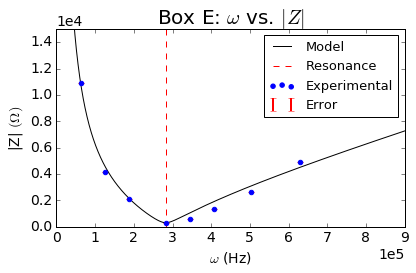

In [599]:
Z = (V_1/I)
Y = 1/Z

plt.scatter(w[17:],Z[17:],color = 'blue',label = "Experimental")

plt.errorbar(w[17:], Z[17:], .2, label = "Error", fmt='none', ecolor = "r", linewidth = 2, zorder=0)

L = 0.00894816914067
C = 1.39791591908e-09
R = 310
w_1 = linspace(40000,900000.531,2000)
z = sqrt(R**2 + ( w_1*L - (1/(w_1*C)) )**2)


plot(w_1,z,color = "black",label = "Model",zorder = 0)

Z_20 = linspace(0,1.6e+4,200)
w_20 = linspace(282743.339,282743.339,200)
plot(w_20,Z_20, 'r--', label = "Resonance",zorder = 0)

plt.xlim(0,.9*10**6)
plt.ylim(-0.5, 1.5*10**4)

mpl.rcParams['font.size'] = 14

plt.xlabel('$\omega$ (Hz)')
plt.ylabel('|Z| $(\Omega)$')

plt.title("Box E: $\omega$ vs. $|Z|$")
plt.legend(prop={'size': 13})#loc='upper left'

ticklabel_format(axis='both', style='sci', scilimits=(-4,4))

plt.tight_layout()

plt.savefig("figures/BoxE_2.pdf")

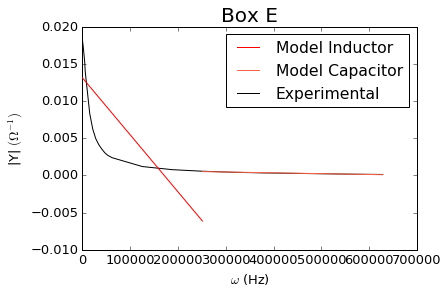

In [22]:
Z = V_1/I

Y = 1/Z



slope, intercept, r_value, p_value, std_err = stats.linregress(w[:21],Y[:21])

line_L = slope*(w[:21]) + intercept

#plot(w[:20],Y[:20],color = 'b',zorder = "1")
plot(w[:21],line_L,color = 'r',zorder = "2",label = "Model Inductor")



slope, intercept, r_value, p_value, std_err = stats.linregress(w[20:],Y[20:])

line_C = slope*(w[20:]) + intercept

#plot(w[20:],Y[20:],color = 'b',zorder = "1")
plot(w[20:],line_C,color = 'tomato', zorder = "2",label = "Model Capacitor")

plot(w[:],Y[:],color = 'black',zorder = "0",label = "Experimental")

mpl.rcParams['font.size'] = 13

plt.xlabel('$\omega$ (Hz)')
plt.ylabel('|Y| $(\Omega ^{-1})$')

plt.title("Box E")
plt.legend()#loc='upper left'


plt.savefig("figures/BoxE_3.pdf")

# Box B -  RL Series

L = 10.207 mH
R = 138.663 Ohms


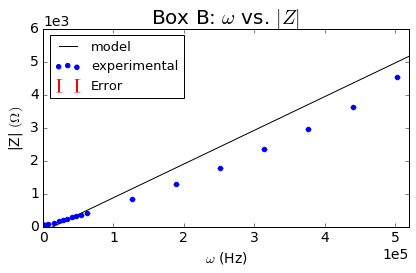

In [436]:
f = array([10, 30, 50, 80, 100, 300, 500, 700, 850, 1000, 2500, 3500, 4500, 5500, 6500, 7500, 8500,
            10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])

phase = array([0, 0.825, 0.725, 2.07, 3.6, 14, 23.3, 30.8, 34.4, 38.9, 61, 67, 72, 76, 76, 78, 79,
               79, 84, 88, 90, 95, 100, 106, 113, 122, 132])

V_1 = array([5.44, 5.44, 5.52, 5.44, 5.44, 5.36, 5.44, 5.52, 5.6, 5.68, 6.56, 6.8, 7, 7.2, 7.28, 7.28, 7.28, 7.36, 7.84, 7.92, 8.24, 8.48, 8.96, 9.6, 10.3, 11.7, 14])

V_2 = array([5.36, 5.44, 5.36, 5.36, 5.44, 5.44, 5.44, 5.6, 5.68, 5.76, 6.4, 6.8, 6.88, 7.12, 7.2, 7.28, 7.44, 7.68, 7.84, 8.16, 8.32, 8.64, 9.06, 9.76, 10.2, 11.2, 14.2])

R = array([54, 54.3, 54.2, 54.2, 55.2, 58.2, 60.2, 64.2, 67.2, 72.7, 117.4, 160.4, 199, 239, 279, 328, 379, 440, 840, 1340, 1800, 2401, 3000, 3700, 4500, 5900, 8030])

w = 2*pi*f

I = V_2/R

Z = V_1/I

 # = R**2+(w*L)**2

w_sqr = w**2

plt.xlim(-6.0e+01, 5.2e+05)
plt.ylim(-.5,6000)

xmin =6.0e+01
xmax = 5.2e+05
xlims = np.linspace(xmin,xmax,25)

slope, intercept, r_value, p_value, std_err = stats.linregress(w,Z)

line = slope*xlims + intercept



plot(xlims,line,color = "black", label = "model",zorder = 0)
plt.scatter(w[:25],Z[:25],color = "b",label = "experimental")
plt.errorbar(w[:25], Z[:25], .2, label = "Error", fmt='none', ecolor = "r", linewidth = 2, zorder=0)

mpl.rcParams['font.size'] = 14

plt.xlabel('$\omega$ (Hz)')
plt.ylabel('|Z| $(\Omega)$')

plt.title("Box B: $\omega$ vs. $|Z|$")
plt.legend(loc='upper left',prop={'size': 13})

L = (slope)

R = (intercept)

print "L =",'%.3f'%(L*1000),"mH"

print "R =",'%.3f'%(-R),"Ohms"

ticklabel_format(axis='both', style='sci', scilimits=(-2,2))

plt.tight_layout()

plt.savefig("figures/BoxB_1.pdf")


L = 6.830 mH
R_R = 55.445 Ohms
[  6.28318531e+01   1.88495559e+02   3.14159265e+02   5.02654825e+02
   6.28318531e+02   1.88495559e+03   3.14159265e+03   4.39822972e+03
   5.34070751e+03   6.28318531e+03   1.57079633e+04   2.19911486e+04
   2.82743339e+04   3.45575192e+04   4.08407045e+04   4.71238898e+04
   5.34070751e+04   6.28318531e+04   1.25663706e+05   1.88495559e+05
   2.51327412e+05   3.14159265e+05   3.76991118e+05   4.39822972e+05
   5.02654825e+05   5.65486678e+05   6.28318531e+05]


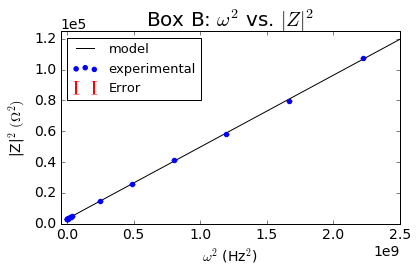

In [437]:
xmin =6.0e+01
xmax = 50000
xlims = np.linspace(xmin,xmax,16)

slope, intercept, r_value, p_value, std_err = stats.linregress(w[:16]**2,Z[:16]**2)

line = slope*xlims**2 + intercept

plot(xlims**2,line[:16],color = "black", label = "model", zorder = 0)
plt.scatter(w[:16]**2,Z[:16]**2,color = "b",label = "experimental")
plt.errorbar(w[:16]**2, Z[:16]**2, .2, label = "Error", fmt='none', ecolor = "r", linewidth = 2, zorder=0)


mpl.rcParams['font.size'] = 14

plt.xlim(-.05e9, 2.5e+09)
plt.ylim(-100,125000)

plt.xlabel('$\omega^2$ (Hz$^2$)')
plt.ylabel('|Z|$^2$ $(\Omega ^{2})$')

plt.title("Box B: $\omega^2$ vs. $|Z|^2$")
plt.legend(loc='upper left',prop={'size': 13})

ticklabel_format(axis='both', style='sci', scilimits=(-2,2))

plt.tight_layout()

plt.savefig("figures/BoxB_2.pdf")




L = sqrt(slope)

R = sqrt(intercept)

print "L =",'%.3f'%(L*1000),"mH"

print "R_R =",'%.3f'%(R),"Ohms"

print w

In [625]:
V_1 = 5
V_2 = 5
R = .5


I = V_2/R
Z = V_1*R/V_2

print Z
print 1/Z

0.5
2.0


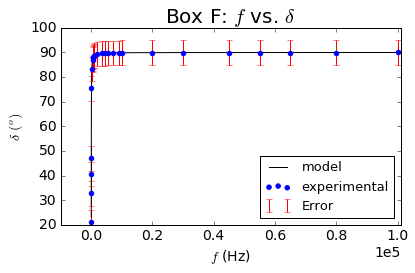

In [478]:
L = 0.00682967219995
L_R = 55.445
theta = degrees(arctan(w*L))

plt.scatter(f,theta,color = "b",label = "experimental")

w_1 = linspace(6.28318531e+01,6.28318531e+05, 2000)
f_1 = linspace(10,100000,2000)
theta_1 = degrees(arctan(w_1*L))

plot(f_1,theta_1,color = "black", label = "model", zorder = 0)

plt.errorbar(f, theta, 5, label = "Error", fmt='none', ecolor = "r", linewidth = 1, zorder=0)

plt.xlim(-.1e5,1.01e5)
plt.ylim(20, 100)

#plt.xlim(-10,110)
#plt.ylim(0,5)

plt.xlabel('$f$ (Hz)')
plt.ylabel('$\delta \ (^o)$')

plt.title("Box F: $f$ vs. $\delta$")
plt.legend(loc='lower right',prop={'size': 13})#loc='upper left'

ticklabel_format(axis='both', style='sci', scilimits=(-3,3))

plt.tight_layout()

plt.savefig("figures/BoxB_3.pdf")